**This notebook is an example notebook of how you can explore and visualize the dataset**

In [2]:
# import some helper libraries
import pandas as pd # for working with dataframes
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns # for pretty plotting
import datetime # for dealing with datetime data

In [3]:
# read in one of the datasets
day_1216 = pd.read_csv('datasets/donations_by_day_2012_2016.csv')

In [4]:
# take a look at the first few data points
day_1216.head()

,ID,Date,DayOfWeek,Type,ReceiptDeclined,Address,AddToMailingList,VolunteerInterest,NoOfDonations,Notes
0,1,8/14/2015,Friday,NaN,NaN,"CR N, Rantoul",n,n,1.0,NaN
1,2,8/14/2015,Friday,NaN,NaN,"Delmar Ave, Champaign",n,n,1.0,NaN
2,3,8/14/2015,Friday,NaN,NaN,"Turkey Farm Rd, Mahomet",n,n,1.0,NaN
3,4,8/14/2015,Friday,NaN,NaN,"N. Lynn St, Apt , Champaign",n,n,1.0,NaN
4,5,8/14/2015,Friday,NaN,NaN,"B Patton Dr, Mahomet",n,n,1.0,NaN


In [5]:
# and get some info about the columns
day_1216.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10072 entries, 0 to 10071
Data columns (total 10 columns):
ID                   10072 non-null int64
Date                 10072 non-null object
DayOfWeek            7956 non-null object
Type                 53 non-null object
ReceiptDeclined      842 non-null object
Address              5849 non-null object
AddToMailingList     9199 non-null object
VolunteerInterest    9201 non-null object
NoOfDonations        10042 non-null float64
Notes                7 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 787.0+ KB


In [6]:
day_1216['NoOfDonations'].unique()

array([ 1.,  6., 18.,  8.,  7.,  9., 10., 12.,  5., 11., 15.,  4.,  2.,
       nan, 14., 13.,  3.,  0., 16., 17., 20.])

One simple question to ask is: What day in the week had the most donations? Let's take a look at the DayOfWeek column. First we want to check for missing values.

In [7]:
sum(day_1216['DayOfWeek'].isnull())

2116

In [8]:
# examining the DayOfWeek column
day_1216['DayOfWeek'].unique()

array(['Friday', 'Saturday', 'Monday', 'Monday ', 'Tuesday ',
       'Wednesday ', 'Thursday', nan, 'Tuesday', 'Wednesday', 'Saturday ',
       'Sunday', ' Monday ', 'MONDAY', 'Thursday ', 'Friday ', 'FRIDAY',
       'SATURDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', ' Saturday',
       ' Monday', 'monday', 'wednesday', '   '], dtype=object)

*Seems like there are many different ways of enter the day of week! Will need to clean them a bit. Or since we have the date for every donation, we can get the day of week straight from there to impute missing entries.*

In [9]:
day_1216['Date'] = pd.to_datetime(day_1216['Date'])

In [10]:
week_days = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}

In [11]:
day_1216['DayOfWeek'] = day_1216['Date'].apply(lambda date: week_days[date.weekday()])

In [12]:
day_1216.head()

,ID,Date,DayOfWeek,Type,ReceiptDeclined,Address,AddToMailingList,VolunteerInterest,NoOfDonations,Notes
0,1,2015-08-14,friday,NaN,NaN,"CR N, Rantoul",n,n,1.0,NaN
1,2,2015-08-14,friday,NaN,NaN,"Delmar Ave, Champaign",n,n,1.0,NaN
2,3,2015-08-14,friday,NaN,NaN,"Turkey Farm Rd, Mahomet",n,n,1.0,NaN
3,4,2015-08-14,friday,NaN,NaN,"N. Lynn St, Apt , Champaign",n,n,1.0,NaN
4,5,2015-08-14,friday,NaN,NaN,"B Patton Dr, Mahomet",n,n,1.0,NaN


*Count the number of donations for each day in the week*

In [21]:
day_1216_week_day_count = day_1216.groupby('DayOfWeek').sum()

In [14]:
day_1216_week_day_count.reset_index(inplace = True)

In [20]:
day_1216_week_day_count[['DayOfWeek', 'NoOfDonations']]

,DayOfWeek,NoOfDonations
0,friday,2418.0
1,monday,1753.0
2,saturday,3119.0
3,sunday,22.0
4,thursday,2264.0
5,tuesday,2703.0
6,wednesday,2550.0


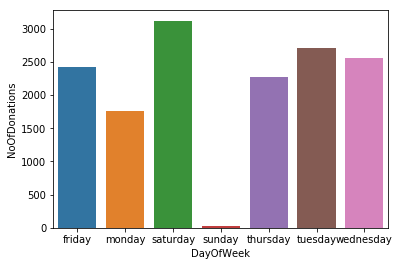

In [17]:
sns.barplot(x = 'DayOfWeek', y = 'NoOfDonations', data = day_1216_week_day_count)

*Can you get the answer from the plot?*